# Plotting and computing finite gradients

In python it is easy to compute and plot gradient fields with `matplotlib` and `numpy`. However, there are some not obvious things one has to do to get the expected result.

- When using the `meshgrid` function, it defaults to index first $y$ and then $x$. This is problematic because later when using the `gradient` function, it does not return the derivatives in the right order. Use the option `indexing='ij'` to compute proper gradients.
- When computing the gradient, make sure to pass $dx$ and $dy$ as arguments to the `gradient` function.
- When plotting the values using `quiver`, use the `angles='xy'` to force U and V to be in coordinate space and not in screen space. Also use `scale=1` and `scale_units='xy'` if we want an accurate arrow magnitude.
- Keep in mind that if the plot has axis which are not to scale, the gradient field representation will **not be perpendicular to the level curves**. Some scaling to the gradient components must be done if we are to represent perpendicular gradients.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

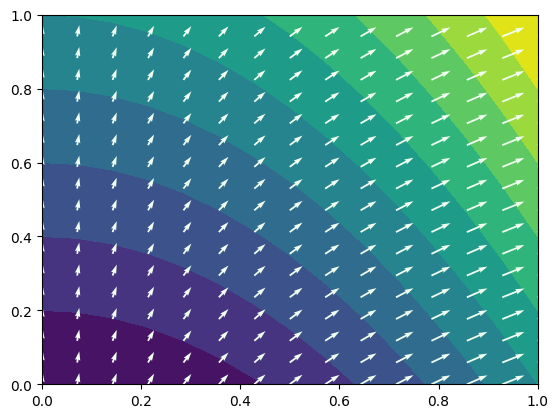

In [22]:
plt.close()
n_points = 15
scale = 1
x_values = np.linspace(0, 1, n_points)
y_values = np.linspace(0, 1, n_points+3)
scale = scale**2
X, Y = np.meshgrid(x_values, y_values, indexing='ij')
Z = X**2 + Y
dx = x_values[1] - x_values[0]
dy = y_values[1] - y_values[0]
grad_x, grad_y = np.gradient(Z, dx, dy)
true_norm = np.sqrt((grad_x)**2 + grad_y**2)
# true_norm = 1
norm = np.sqrt((grad_x*scale)**2 + grad_y**2)
plt.contourf(X, Y, Z, levels=10)
plt.quiver(X, Y, grad_x/norm*scale*true_norm, grad_y/norm*true_norm, color='honeydew', angles="xy")
plt.savefig("gradients.png")
plt.show()